# Shinzo Abe murder Twitter Sentiment Analysis

Following the [shocking murder of Japan ex Prime Minister, Shinzo Abe](https://www.bbc.com/news/world-asia-62089486) I wanted to put into practice my skills and know Twitter's perception of this big news. Follow along to see what I found.

In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('shinzoabe_tweets.csv')

In [3]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-07-08 23:59:59+00:00,kitty201718,@uryuhirano @AbeShinzo RIP He will be missed ...
1,1,2022-07-08 23:59:58+00:00,VoteJoeBudd,I was in the room when President Trump and for...
2,2,2022-07-08 23:59:58+00:00,minionssuperfan,All my weeb friends sadposting about Shinzo Ab...
3,3,2022-07-08 23:59:53+00:00,LordSMAF,My thoughts following the Shinzo Abe thing was...
4,4,2022-07-08 23:59:53+00:00,ANI,US President called Japanese PM to express his...


In [4]:
df['Tweet']

0       @uryuhirano @AbeShinzo RIP  He will be missed ...
1       I was in the room when President Trump and for...
2       All my weeb friends sadposting about Shinzo Ab...
3       My thoughts following the Shinzo Abe thing was...
4       US President called Japanese PM to express his...
                              ...                        
9995    Shinzo Abe, a former Japanese prime minister, ...
9996    "Today world lost a wonderful person, great de...
9997    Shinzo Abe, a former Japanese prime minister, ...
9998    The assassination of former Prime Minister Shi...
9999    Shocked to hear about the sudden demise of Pri...
Name: Tweet, Length: 10000, dtype: object

In [5]:
i = 1
for tweet in df['Tweet'][0:5]:
    print(str(i) + ')' + tweet + '\n')
    i = i + 1

1)@uryuhirano @AbeShinzo RIP  He will be missed and remembered for standing up for HongKongers. 🙏🏻🙏🏻🙏🏻

2)I was in the room when President Trump and former Japan Prime Minister Shinzo Abe held a joint conference. Very sorry to hear of the extremely sad news of Shinzo's assassination. 😥 https://t.co/T9sj6w448O

3)All my weeb friends sadposting about Shinzo Abe's assassination is so funny lmao

4)My thoughts following the Shinzo Abe thing wasn't even any of the usual discourse about "Did he deserve it? Did he not? Is it bad to speak ill of the dead?", it was just this realization that 2022 is so crazy a political assassination might not even be the biggest news this WEEK.

5)US President called Japanese PM to express his deep condolences on the death of Ex-PM Shinzo Abe. President noted the importance of PM Abe’s enduring legacy with his vision of a free &amp; open Indo-Pacific &amp; establishment of QUAD meetings of Japan, US, Australia &amp; India: White House https://t.co/0jrL6EWNQY



Im going to get rid of unnecesary characters such as @ or hyperlinks or Retweets.

In [6]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['Tweet'] = df['Tweet'].apply(cleanTxt)

i = 1
for tweet in df['Tweet'][0:5]:
    print(str(i) + ')' + tweet + '\n')
    i = i + 1

1)  RIP  He will be missed and remembered for standing up for HongKongers. 🙏🏻🙏🏻🙏🏻

2)I was in the room when President Trump and former Japan Prime Minister Shinzo Abe held a joint conference. Very sorry to hear of the extremely sad news of Shinzo's assassination. 😥 

3)All my weeb friends sadposting about Shinzo Abe's assassination is so funny lmao

4)My thoughts following the Shinzo Abe thing wasn't even any of the usual discourse about "Did he deserve it? Did he not? Is it bad to speak ill of the dead?", it was just this realization that 2022 is so crazy a political assassination might not even be the biggest news this WEEK.

5)US President called Japanese PM to express his deep condolences on the death of Ex-PM Shinzo Abe. President noted the importance of PM Abe’s enduring legacy with his vision of a free &amp; open Indo-Pacific &amp; establishment of QUAD meetings of Japan, US, Australia &amp; India: White House 



We will be using TextBlob Subjectivity and Polarity.

In [7]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

df.head()

,Unnamed: 0,Date,User,Tweet,Subjectivity,Polarity
0,0,2022-07-08 23:59:59+00:00,kitty201718,RIP He will be missed and remembered for st...,0.000000,0.000000
1,1,2022-07-08 23:59:58+00:00,VoteJoeBudd,I was in the room when President Trump and for...,0.666667,-0.383333
2,2,2022-07-08 23:59:58+00:00,minionssuperfan,All my weeb friends sadposting about Shinzo Ab...,1.000000,0.425000
3,3,2022-07-08 23:59:53+00:00,LordSMAF,My thoughts following the Shinzo Abe thing was...,0.488095,-0.321429
4,4,2022-07-08 23:59:53+00:00,ANI,US President called Japanese PM to express his...,0.340000,0.080000


We will generate a word cloud using WordCloud.

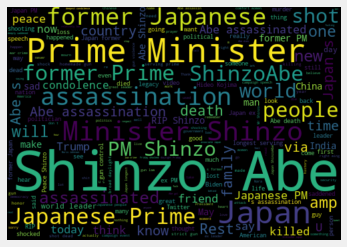

In [18]:
allWords = ' '.join( [twts for twts in df['Tweet']])
wordCloud = WordCloud(width=500, height=350, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [9]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head()

,Unnamed: 0,Date,User,Tweet,Subjectivity,Polarity,Analysis
0,0,2022-07-08 23:59:59+00:00,kitty201718,RIP He will be missed and remembered for st...,0.000000,0.000000,Neutral
1,1,2022-07-08 23:59:58+00:00,VoteJoeBudd,I was in the room when President Trump and for...,0.666667,-0.383333,Negative
2,2,2022-07-08 23:59:58+00:00,minionssuperfan,All my weeb friends sadposting about Shinzo Ab...,1.000000,0.425000,Positive
3,3,2022-07-08 23:59:53+00:00,LordSMAF,My thoughts following the Shinzo Abe thing was...,0.488095,-0.321429,Negative
4,4,2022-07-08 23:59:53+00:00,ANI,US President called Japanese PM to express his...,0.340000,0.080000,Positive


In [10]:
# Printing all positive tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweet'][i])
        print()
        j = j + 1

1) All my weeb friends sadposting about Shinzo Abe's assassination is so funny lmao

2) US President called Japanese PM to express his deep condolences on the death of Ex-PM Shinzo Abe. President noted the importance of PM Abe’s enduring legacy with his vision of a free &amp; open Indo-Pacific &amp; establishment of QUAD meetings of Japan, US, Australia &amp; India: White House 

3)  Shinzo Abe was a great politician.
 It's a pity that we have to talk in the past tense.

4) An excellent &amp; informative thread on Shinzo Abe &amp; the Jap right wing nationalist-extremists. Remember when Jap ‘farmers’ opposed the construction &amp; operation of the then new Narita airport? The real power behind this were certainly the xenophobic right wing nationalists. 

5) May your soul Rest In Peace Shinzo Abe . You were a very good friend of India . We are shocked about your assassination by evil enemy 
You are loved by us and Indians love you a lot . You were a very good friend of India . Our suppo

ShinzoAbe 

1155)  Condolences to Mr Shinzo Abe family &amp; his loved ones! 🕊

1156) Shinzo abe, an honorable precious son of Japan assassinated
【Tony Marano】


1157) Former Prime Minister Shinzo Abe, the longest-serving leader of modern Japan, was gunned down on Friday while campaigning for a parliamentary election.  

1158) Watching white Muricans, especially Liberals, cry over Shinzo Abe is hilarious. Y'all a bunch of crocodile tear motherfuckers. He was a Japanese cross between Trump and Reagan. Quit pretending you know anything about the guy.

1159)   in these times it’s important to feel comfort. that’s why shinzo abe comfort women will be sent to joshua to heal

1160) Seeing a lot of people condoning Shinzo Abe's assassination because they do not like him / his beliefs is pretty messed up.

1161)  The most important thing i think, about Shinzo Abe, is his demeanor. he was so kindly to all, and unlike many american male politicians, he was a comfort to women.

If you would like 



2060) 
If you release Assadi  another Shinzo Abe would be assassinate in your own soil because of your appeasement with Khamenei the God father of terrorism in the world 

2061) Vital to condemn violence and this unlawful killing. Condolences to the Japanese people. ShinzoAbe 

2062) 🇯🇵Video of the assassination of Shinzo Abe,it looks the first attempt to assasinate failed,and the second was sucessfull 

2063) Tonight I will impatiently await better call saul season 6b in honour of Shinzo Abe. It's what he would have wanted

2064) I am so shocked and saddened by the assassination of Shinzo Abe. He was central to successfully concluding and later saving the Trans Pacific Partnership. He was a strong, resolute leader for Japan, in the region, and in the world. I respected him so much. Japan ShinzoAbe TPP

2065) TIME's new cover: The legacy of Shinzo Abe, Japan's longest-serving leader  

2066) ShinzoAbe 
Rest in peace. He was true leader. He did much for his nation. 



2067) Shinzo Ab

3018) Just got a news blast from Yahoo that Shinzo Abe had been shot and is in critical condition and, Yahoo, you've gotta do better.

3019) I am deeply saddened to learn that the former Prime Minister of Japan Shinzo Abe has lost his life as a result of a heinous armed attack today.
I extend my sincere condolences to his family, as well as to the friendly people and Government of Japan.

3020) The former prime minister has died from his injuries after a shooting at the age of 67. Shinzo Abe resigned from the top post in 2020, but his legacy has had a lasting impact on everyday Japanese life and politics. 

3021) oh yeah happy "Japan PM Shinzo Abe shot to death" day everybody!

3022) . Family -  Most sincere condolences on the loss of a great leader.  🇯🇵

3023) India pays tributes to its ‘great friend’ Shinzo Abe; state mourning on Saturday 

3024) shinzo abe is dead what a great day

3025) 2/2-Shinzo Abe with a wide range of Indian PM’s, President Pranab, EAM, Jaishankar. We Indians l

In [11]:
# Printing all negative tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweet'][i])
        print()
        j = j + 1

1) I was in the room when President Trump and former Japan Prime Minister Shinzo Abe held a joint conference. Very sorry to hear of the extremely sad news of Shinzo's assassination. 😥 

2) My thoughts following the Shinzo Abe thing wasn't even any of the usual discourse about "Did he deserve it? Did he not? Is it bad to speak ill of the dead?", it was just this realization that 2022 is so crazy a political assassination might not even be the biggest news this WEEK.

3) They killed Shinzo Abe down by the stadium

4) they hit shinzo abe with a fallout 4 pipe gun but im supposed to not laugh..... RIP✝️ 

5) _spicer _reid4344  I don't believe our pres needed 2 be woken up 4 this.
Very serious, tragic situations that need immediate attention r dealt w as such.
Unfortunately we can't wake up our pres 4 every event. He has very competent talent surrounding him that delegate as needed.
RIP PM Shinzo Abe.

6) Tiny Sirico died of a broken heart following the assassination of his lifelong friend 

1173)  The political authority of Shinzo Abe's party rests on decades of violent authoritarian ultra-nationalist political suppression.

1174) Saddened to hear about the tragic demise of former Japan Prime Minister Shinzo Abe. My deepest condolences to the Abe family

1175) Decoding the security failings behind Shinzo Abe's assassination 

1176) ROSA PARKS LAWYER FRED GRAY AND SHINZO ABE KILLED BY TETSUYA Civil Rights Champion Fred Gray Awarded Presidential Medal of Freedom 

1177)  Shinzo Abe could be wrong for some people but a deceased person isn't the person before.
You must respect him until his last ceremony.
That's how humanity remains.

1178)   Why navy staff killed Shinzo Abe, because he stop navy and military retirement benefits? 🙏

1179) See, here's the thing: This down here doesn't do anything. Shooting Shinzo Abe does. 

1180) The way the media is talking about Shinzo Abe’s assassination, it’s almost as if they are glad he got assassinated. They couldn’t be that evil could


2150) I'm not sure when the announcement came but they are saying Shinzo Abe passed after the shooting.

Crazy times.

2151) shinzo abe killed by pez dispenser

2152) Here's how the world reacted to the shocking assassination of the former Japanese PM ShinzoAbe.

Japan 

2153)  i have a friend who is in japan... just heart broken.. she didn't knew shinzoabe she just upset that someone would just murder a person in broad daylight

2154) 📷 Former Japanese Prime Minister Shinzo Abe Shot Dead: Live Updates) ~  Here’s the stupidity of this violent act.  It’s true that Shinzo Abe was Japan’s longest serving prime minister.... 

2155)  The dirty chinese communist party cpc nationalists on Weibo began to celebrate the attack on Abe, called the attacker a “hero” and sent death wishes to the former PM Shinzo Abe. 

2156) Shinzo Abe’s suspected assassin pictured behind him before killing  SmartNews

2157) KOA extends its condolences to the families of the Amarnath pilgrims! The tragic incident l

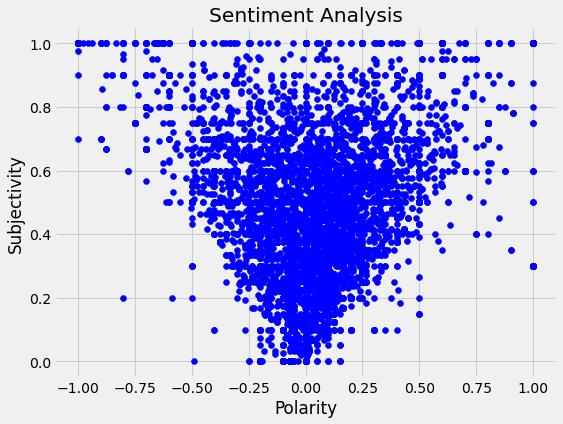

In [12]:
#Scatter plot to visualize the cases by Subjectivity and Polarity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = ['Blue'])

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Based on this scatter plot, we can see that most cases are around 0, which possibly means that there are a lot neutral cases.

In [13]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']

round((ptweets.shape[0] / df.shape[0] * 100), 1)

31.2

In [14]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']

round((ntweets.shape[0] / df.shape[0] * 100), 1)

27.7

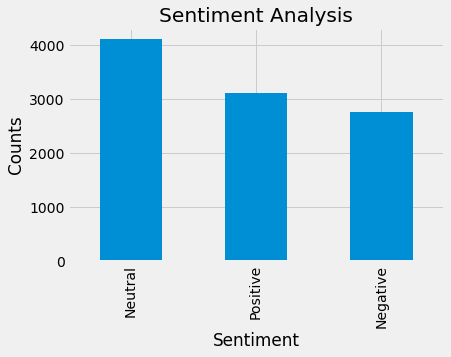

In [15]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

As we already infered, there was a big amount of neutral cases, this is because Twitter serves as a news channel and obviously, since this was a big note, it was mostly news that we scraped.

For the positive sentiment, we see that most of them were praising Shinzo Abe, while most of the negative cases we got where either feeling sorry for Abe's death, feeling angry towards it or comments feeling grateful of Abe's death, which we assume, they come from users that were opposed to Abe.


Thanks for reading this. If you like it or if do you have any feedback, please let me know, it would be pretty helpful.